In [1]:
from ipywidgets import widgets
from IPython.display import display
from mpl_toolkits.mplot3d import axes3d
from collections import namedtuple

import csv
import re
import matplotlib
import time

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

font = {'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)

In [2]:
fields = [
    'xstart', 'ystart', 'zstart',
    'xstop', 'ystop', 'zstop', 'res',
    'total_pix', 'mask_core_pix', 'str_mask_fraction',
    'syn_count', 'str_density'#, 'syn_count_unmasked'
]
raw = open('merged_mask_v5_layer23only_DSP.csv', 'r').readlines()
reader = csv.reader(raw)

In [3]:
data = [[float(col) for col in row] for row in reader]

In [27]:
data = np.asarray(data)
d = data

dd = d[:,11]
#print d[10000:11000]

print np.mean(dd[dd>0])

print np.sum(data[:,10])
print 1.0*np.sum(data[:,10])/(np.sum(data[:,7]-data[:,8])*(.004*32*.004*32*0.045))


d_mean = np.mean(dd[dd>0])
d_std = np.std(dd[dd>0])

print d_mean
print d_std

print d_mean - 2*d_std
print d_mean + 2*d_std
new_d = d

1.35019287124
6064110.0
1.44748133107
1.35019287124
0.520018928256
0.310155014732
2.39023072776


# 3D Plot

### Scatter plot with sliding threshold

In [5]:
dim = 11
lower_initial = 1.05# np.mean([d[dim] for d in data])
upper_initial = 1.12 # 2*np.mean([d[dim] for d in data])
upper_max = 4*np.mean([d[dim] for d in data])
alpha_initial = 0.2
colour_initial = '#000000'
marker_initial = 10 # worth noting: using dim 11 marker scaling is subtle since the range is small
fig_title = "3D Distribution of Synapses in Space"

Range of Data: 0.0 - 4.505
Number of Samples Currently in View: 43295 (of  101649)
Last updated at: Mon Jun 27 00:10:57 2016


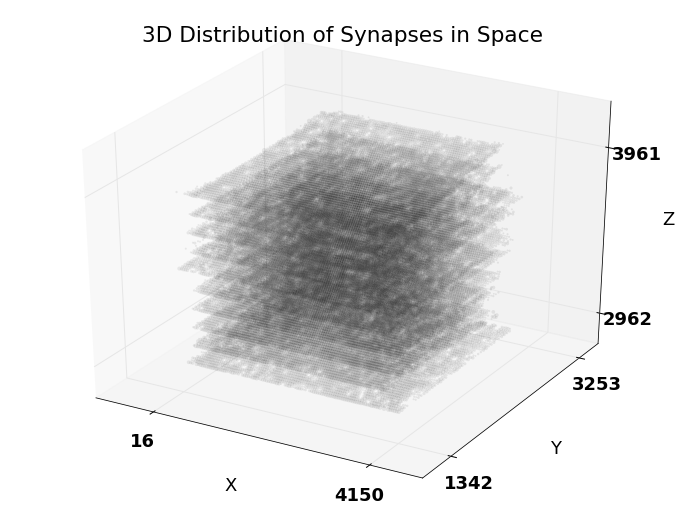

In [6]:
def plotting3d(thresh_min, thresh_max, alph, scale, colour=colour_initial, title=fig_title):
    fig0 = plt.figure(figsize=(12,9))
    ax = fig0.gca(projection="3d")
    if len(colour) < 6 or not re.search(r'^#(?:[0-9a-fA-F]{3}){1,2}$', colour):
        colour="#000000"
    new_d = np.array([d for d in data if d[dim] > thresh_min and d[11] < thresh_max])
    ax.scatter3D(
        [d[0] for d in new_d],
        [d[1] for d in new_d],
        [d[2] for d in new_d],
        s=[scale*10*d[11] for d in new_d],
        alpha=alph,
        linewidth=0,
        c=colour
    )
    print "Range of Data:", np.min([d[11] for d in data]), "-", np.max([d[dim] for d in data])
    print "Number of Samples Currently in View:", len(new_d) , "(of ", str(len(data))+")"
    ax.set_xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    ax.set_yticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    ax.set_zticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    print "Last updated at:", time.ctime()
    plt.show()

thresh_min, thresh_max, alph, marker = (widgets.FloatSlider(description="Lower Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=lower_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Upper Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=upper_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Alpha Scaling", 
                                                    min=0,
                                                    max=1,
                                                    value=alpha_initial,
                                                    step=0.01),
                                        widgets.FloatSlider(description="Marker Scaling", 
                                                    min=0.1,
                                                    max=15,
                                                    value=marker_initial,
                                                    step=0.1))
set_min, set_max = (widgets.FloatText(description="Set Lower Threshold",
                                      value=lower_initial),
                    widgets.FloatText(description="Set Upper Threshold",
                                         value=upper_initial))
dl = widgets.jsdlink((thresh_min, 'value'), (thresh_max, 'min'))
d2 = widgets.jsdlink((set_min, 'value'), (thresh_min, 'value'))
d3 = widgets.jsdlink((set_max, 'value'), (thresh_max, 'value'))

display(set_min, set_max)
w = widgets.interact(plotting3d, thresh_min=thresh_min,
                     thresh_max=thresh_max, alph=alph,
                     scale=marker)

def on_min_change(change):
    thresh_min.notify_change(change)
set_min.observe(on_min_change, names='value')

def on_max_change(change):
    thresh_max.notify_change(change)
set_max.observe(on_max_change, names='value')

# MIP

In [21]:
buff=20
fig_title = 'Maximum Intensity Projection of Synapses\n\n'
alpha_initial = 0.1
marker_initial = 12
jitter_initial = 0.65

Last updated at: Fri Jun 24 10:02:31 2016


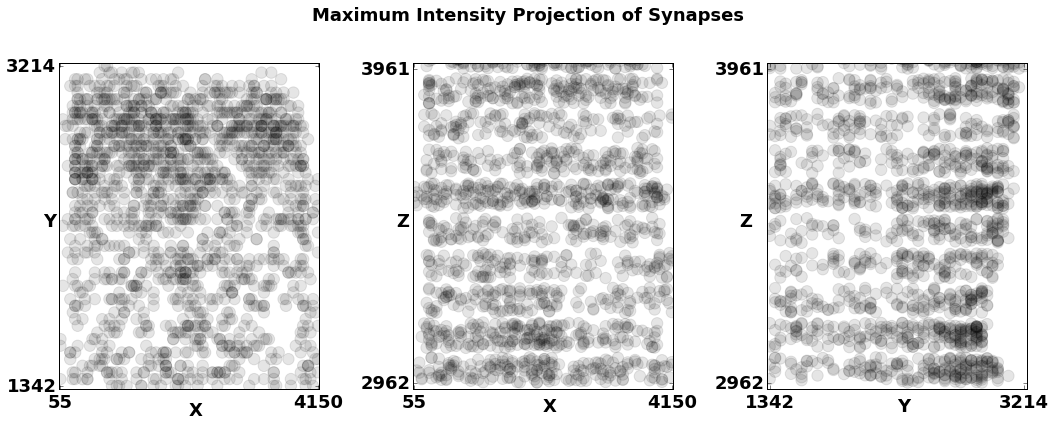

In [27]:
def projections(thresh_min, thresh_max, alph, scale, jitter, colour=colour_initial, title=fig_title):
    new_d = np.array([d for d in data if d[dim] > thresh_min and d[dim] < thresh_max])
    max_jitter = jitter*(np.max(new_d[:,2]) - np.min(new_d[:,2]))/8.
    ## XY
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,3,1)
    plt.hold(True)
    plt.scatter(
        [d[0] for d in new_d],
        [d[1] for d in new_d],
        s=[10*scale*d[dim] for d in new_d],
        alpha=alph,
        c=colour
    )
    plt.xlim([np.min(new_d[:,0])-buff, np.max(new_d[:,0])+buff])
    plt.ylim([np.min(new_d[:,1])-buff, np.max(new_d[:,1])+buff])
    plt.xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    plt.yticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    plt.text(np.min(new_d[:,0])-buff-260, (np.min(new_d[:,1])-buff + np.max(new_d[:,1])+buff)/2, 'Y')
    plt.text((np.min(new_d[:,0])-buff + np.max(new_d[:,0])+buff)/2, np.min(new_d[:,1])-buff-150, 'X')
    
    ## XZ
    ax = plt.subplot(1,3,2)
    plt.hold(True)
    plt.scatter(
        [d[0] for d in new_d],
        [d[2]+max_jitter*np.random.rand(1) for d in new_d],
        s=[10*scale*d[dim] for d in new_d],
        alpha=alph,
        c=colour
    )
    plt.xlim([np.min(new_d[:,0])-buff, np.max(new_d[:,0])+buff])
    plt.ylim([np.min(new_d[:,2])-buff, np.max(new_d[:,2])+buff])
    plt.xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    plt.yticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    plt.text(np.min(new_d[:,0])-buff-250, (np.min(new_d[:,2])-buff + np.max(new_d[:,2])+buff)/2, 'Z')
    plt.text((np.min(new_d[:,0])-buff + np.max(new_d[:,0])+buff)/2, np.min(new_d[:,2])-buff-70, 'X')
    
    ## YZ
    ax = plt.subplot(1,3,3)
    plt.hold(True)
    plt.scatter(
        [d[1] for d in new_d],
        [d[2]+max_jitter*np.random.rand(1) for d in new_d],
        s=[10*scale*d[dim] for d in new_d],
        alpha=alph,
        c=colour
    )
    plt.xlim([np.min(new_d[:,1])-buff, np.max(new_d[:,1])+buff])
    plt.ylim([np.min(new_d[:,2])-buff, np.max(new_d[:,2])+buff])
    plt.xticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    plt.yticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    plt.text(np.min(new_d[:,1])-buff-200, (np.min(new_d[:,2])-buff + np.max(new_d[:,2])+buff)/2, 'Z')
    plt.text((np.min(new_d[:,1])-buff + np.max(new_d[:,1])+buff)/2, np.min(new_d[:,2])-buff-70, 'Y')
    plt.tight_layout()
    plt.suptitle(title)
    plt.subplots_adjust(top=0.85)
    print "Last updated at:", time.ctime()
    plt.show()
    
thresh_min, thresh_max, alph, marker, jitter = (widgets.FloatSlider(description="Lower Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=lower_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Upper Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=upper_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Alpha Scaling", 
                                                    min=0,
                                                    max=1,
                                                    value=alpha_initial,
                                                    step=0.01),
                                        widgets.FloatSlider(description="Marker Scaling", 
                                                    min=0.1,
                                                    max=15,
                                                    value=marker_initial,
                                                    step=0.1),
                                        widgets.FloatSlider(description="Maximum Jitter",
                                                    min=0,
                                                    max=1,
                                                    value=jitter_initial,
                                                    step=0.05))

set_min, set_max = (widgets.FloatText(description="Set Lower Threshold",
                                      value=lower_initial),
                    widgets.FloatText(description="Set Upper Threshold",
                                         value=upper_initial))
dl = widgets.jsdlink((thresh_min, 'value'), (thresh_max, 'min'))
d2 = widgets.jsdlink((set_min, 'value'), (thresh_min, 'value'))
d3 = widgets.jsdlink((set_max, 'value'), (thresh_max, 'value'))

display(set_min, set_max)
w = widgets.interact(projections, thresh_min=thresh_min,
                     thresh_max=thresh_max, alph=alph,
                     scale=marker, jitter=jitter)

def on_min_change(change):
    thresh_min.notify_change(change)
set_min.observe(on_min_change, names='value')

def on_max_change(change):
    thresh_max.notify_change(change)
set_max.observe(on_max_change, names='value')

## 2D Max Projection Heatmap

In [8]:
buff=20
fig_title = 'Maximum Intensity Projection of Synapses\n\n'
jitter_initial = 0.65
n_bins = 20

Last updated at: Mon Jun 27 00:29:44 2016


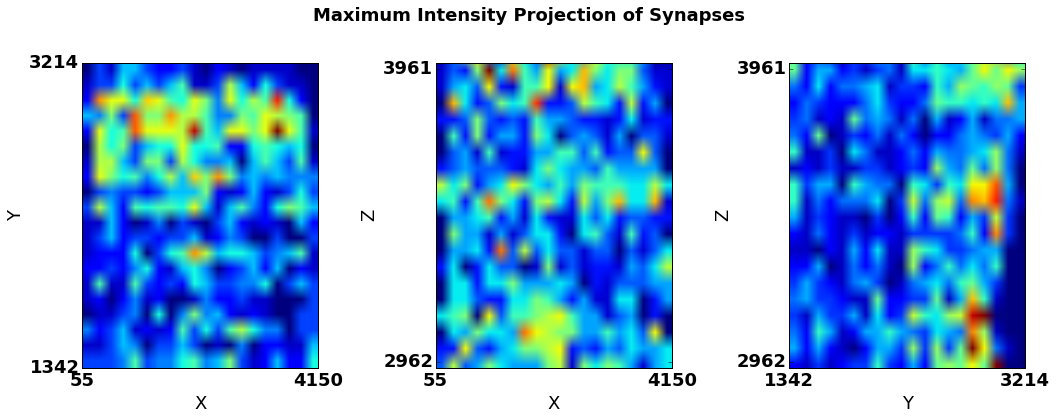

In [43]:
def projections(thresh_min, thresh_max, jitter, bins=n_bins, title=fig_title):
    new_d = np.array([d for d in data if d[dim] > thresh_min and d[dim] < thresh_max])
    max_jitter = jitter*(np.max(new_d[:,2]) - np.min(new_d[:,2]))/8.
    ## XY
    fig = plt.figure(figsize=(15,6))
    ax = plt.subplot(1,3,1)
    plt.hold(True)
    heatmap, xedges, yedges = np.histogram2d([d[0] for d in new_d],
                                             [d[1] for d in new_d], bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
    plt.xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    plt.yticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    plt.ylabel('Y')
    plt.xlabel('X')
    
    ## XZ
    ax = plt.subplot(1,3,2)
    plt.hold(True)
    heatmap, xedges, yedges = np.histogram2d([d[0] for d in new_d],
                                             [d[2]+max_jitter*np.random.rand(1)-max_jitter*np.random.rand(1)/2.
                                              for d in new_d], bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
    plt.xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
    plt.yticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    plt.ylim([np.min(new_d[:,2])-buff, np.max(new_d[:,2])+buff])
    plt.ylabel('Z')
    plt.xlabel('X')
    
    ## YZ
    ax = plt.subplot(1,3,3)
    plt.hold(True)
    heatmap, xedges, yedges = np.histogram2d([d[1] for d in new_d],
                                             [d[2]+max_jitter*np.random.rand(1)-max_jitter*np.random.rand(1)/2.
                                              for d in new_d], bins=bins)
    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
    plt.xticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
    plt.yticks([np.min(new_d[:,2]), np.max(new_d[:,2])])
    plt.ylim([np.min(new_d[:,2])-buff, np.max(new_d[:,2])+buff])
    plt.ylabel('Z')
    plt.xlabel('Y')
    plt.tight_layout()
    plt.suptitle(title)
    plt.subplots_adjust(top=0.85)
    print "Last updated at:", time.ctime()
    plt.show()
    
thresh_min, thresh_max, jitter = (widgets.FloatSlider(description="Lower Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=lower_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Upper Threshold Scaling",
                                                    min=0,
                                                    max=upper_max,
                                                    value=upper_initial,
                                                    step=upper_max/100.),
                                        widgets.FloatSlider(description="Maximum Jitter",
                                                    min=0,
                                                    max=1,
                                                    value=jitter_initial,
                                                    step=0.05))

set_min, set_max = (widgets.FloatText(description="Set Lower Threshold",
                                      value=lower_initial),
                    widgets.FloatText(description="Set Upper Threshold",
                                         value=upper_initial))
dl = widgets.jsdlink((thresh_min, 'value'), (thresh_max, 'min'))
d2 = widgets.jsdlink((set_min, 'value'), (thresh_min, 'value'))
d3 = widgets.jsdlink((set_max, 'value'), (thresh_max, 'value'))

display(set_min, set_max)
w = widgets.interact(projections, thresh_min=thresh_min,
                     thresh_max=thresh_max,
                     jitter=jitter)

def on_min_change(change):
    thresh_min.notify_change(change)
set_min.observe(on_min_change, names='value')

def on_max_change(change):
    thresh_max.notify_change(change)
set_max.observe(on_max_change, names='value')

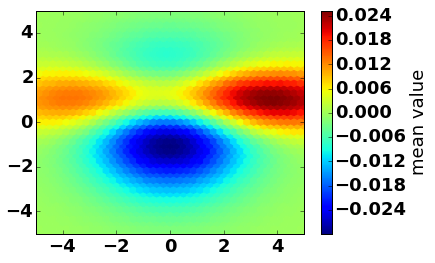

In [104]:
from matplotlib import pyplot as PLT
from matplotlib import cm as CM
from matplotlib import mlab as ML
import numpy as NP

n = 1e2
x = y = NP.linspace(-5, 5, 100)
X, Y = NP.meshgrid(x, y)
Z1 = ML.bivariate_normal(X, Y, 2, 2, 0, 0)
Z2 = ML.bivariate_normal(X, Y, 4, 1, 1, 1)
ZD = Z2 - Z1
x = X.ravel()
y = Y.ravel()
z = ZD.ravel()
gridsize=40
PLT.subplot(111)

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

PLT.hexbin(x, y, C=z, gridsize=gridsize, cmap=CM.jet, bins=None)
PLT.axis([x.min(), x.max(), y.min(), y.max()])

cb = PLT.colorbar()
cb.set_label('mean value')
PLT.show()   

In [10]:
np.shape(new_d)

NameError: name 'new_d' is not defined

In [22]:
d = data[:,11]
print np.max(d)

4.505


[ 0.  0.  0. ...,  0.  0.  0.]


IndexError: invalid index to scalar variable.

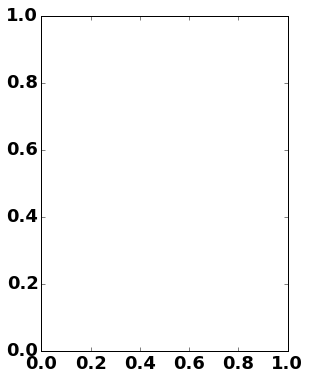

In [23]:
d = data[:,11]
print d
bins = 20
new_d = d
## XY
fig = plt.figure(figsize=(15,6))
ax = plt.subplot(1,3,1)
plt.hold(True)
heatmap, xedges, yedges = np.histogram2d([d[0] for d in new_d],
                                         [d[1] for d in new_d], bins=bins)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.ylabel('Y')
plt.xlabel('X')
print heatmap

## 3D Navigation and Blending

In [25]:
xstart = 20000
ystart = 25000
zstart = 4002
xstop = 20500
ystop = 25500
zstop = 4012

token_synapse = 'MP4merged'
channel_synapse = 'annotation'

token_mask = 'bock11_mask_v1'
channel_mask = 'mask'

from ndio.remote import neurodata as neurodata

nd = neurodata(chunk_threshold=2e9,suppress_warnings=True)

syn = nd.get_cutout(token_synapse, channel_synapse, xstart, xstop, ystart, ystop, zstart, zstop, resolution=1)
mask = nd.get_cutout(token_mask, channel_mask, xstart, xstop, ystart, ystop, zstart, zstop, resolution=1)
image = nd.get_cutout('bock11', 'image', xstart, xstop, ystart, ystop, zstart, zstop, resolution=1)

In [14]:
alpha = 0.7
slicez = 1
base_im = image
anno_im = syn
mask_im = mask
mask_flag = True
fig_title = 'Slices of Dataset'

Last updated at: Thu Jun 23 22:43:03 2016


/Users/graywr1/.conda/envs/ndp/lib/python2.7/site-packages/numpy/ma/core.py:4139: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


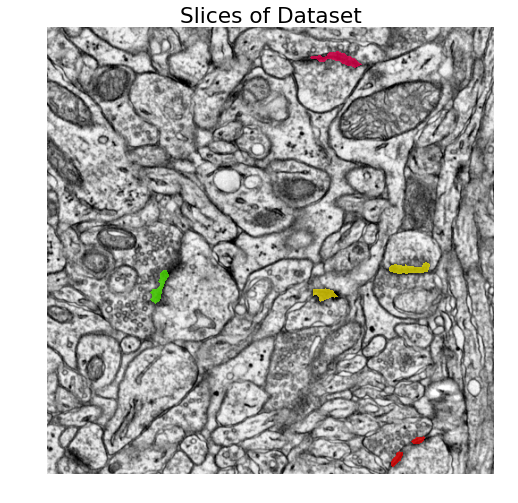

In [15]:
def nav3dslices(zslice, alph, cmap, title=fig_title, mask=mask_flag):
    fig = plt.figure(figsize=(8,8))
    plt.imshow(base_im[:,:,zslice].T, cmap='gray', interpolation='bilinear')
    plt.hold(True) 
    anno2 = np.asarray(anno_im, dtype='float')
    anno2[anno2 == 0] = np.nan  # zero out bg
    plt.imshow(anno2[:,:,zslice].T, cmap=cmap, alpha=alph, interpolation='nearest')
    if mask:
        mask2 = np.asarray(mask_im, dtype='float')
        mask2[mask2 == 0] = np.nan  # zero out bg
        plt.imshow(mask2[:,:,zslice].T, cmap='gray', alpha=alph, interpolation='nearest')
    plt.axis('off')
    plt.title(fig_title)
    print "Last updated at:", time.ctime()
    plt.show()

cmaps = plt.colormaps()
zslice, alph, set_cmap = (widgets.IntSlider(description="Set zslice",
                                            min=0,
                                            max=base_im.shape[2]-1,
                                            value=slicez,
                                            step=1),
                           widgets.FloatSlider(description="Alpha Scaling", 
                                            min=0,
                                            max=1,
                                            value=alpha,
                                            step=0.01),
                           widgets.Dropdown(description="Annotation colourmap",
                                            options={str(c): c for c in cmaps},
                                            value='prism_r'))

set_slice = (widgets.FloatText(description="Set slice",
                               value=slicez))
dl = widgets.jsdlink((set_slice, 'value'), (zslice, 'value'))
display(set_slice)
w = widgets.interact(nav3dslices, zslice=zslice, alph=alph,cmap=set_cmap)

def on_slice_change(change):
    zslice.notify_change(change)
set_slice.observe(on_slice_change, names='value')

In [ ]:
print 'test'

In [70]:
im = nd.get_cutout('bock11', 'image', 0, 265, 0, 234, 2917, 4156, resolution=9)


In [86]:
im2 = im > 0

import skimage.morphology
im3 = skimage.morphology.dilation(im2,skimage.morphology.ball(4))
im3 = skimage.morphology.erosion(im3,skimage.morphology.ball(4))


In [87]:
pix = np.sum(im > 0)
print pix

pix3 = np.sum(im3 > 0)
print pix3

40046661
45654239


In [88]:
print pix*0.004*2**9*0.004*2**9*0.045
print pix3*0.004*2**9*0.004*2**9*0.045

7558554.16885
8616949.07646


In [89]:
#7.6MM um^3, vs. 15854347

In [92]:
1.0*11668787/8616949#8852204

1.3541668866788001

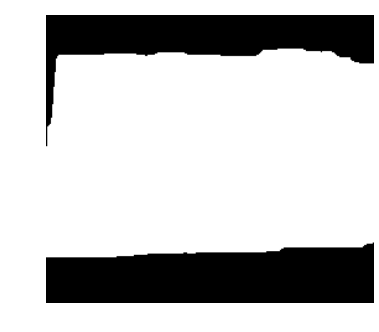

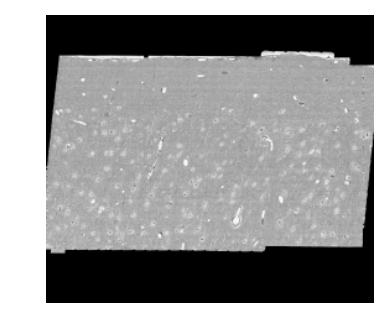

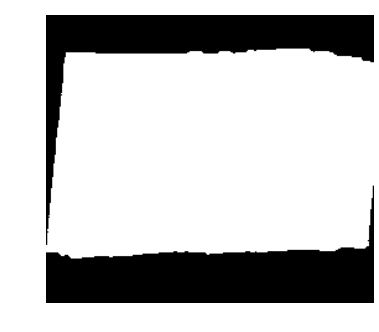

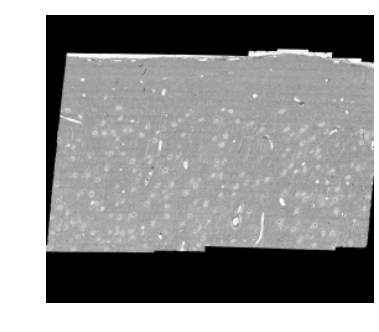

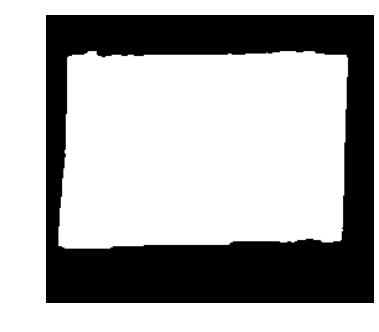

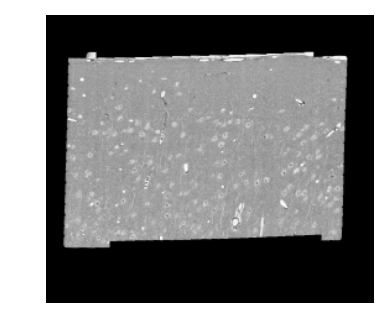

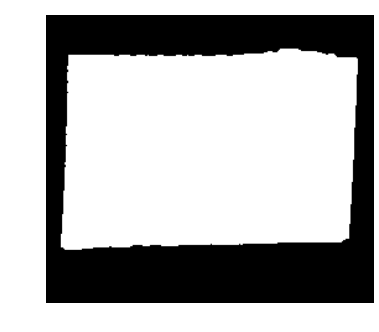

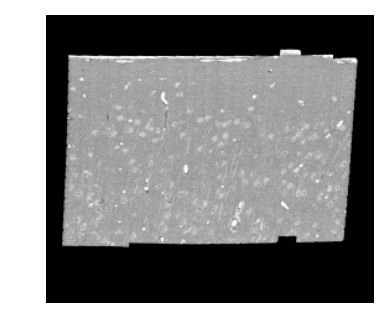

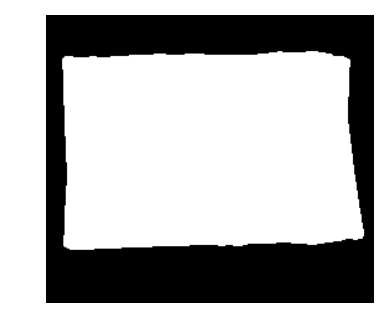

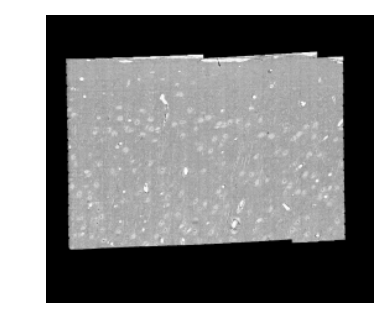

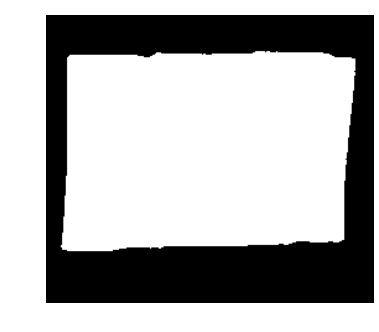

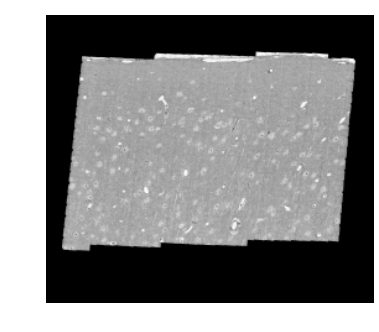

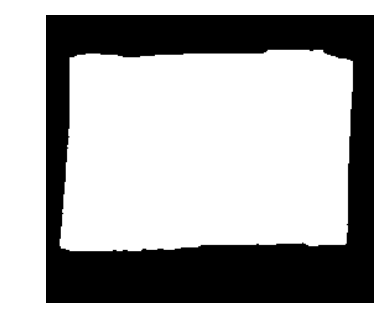

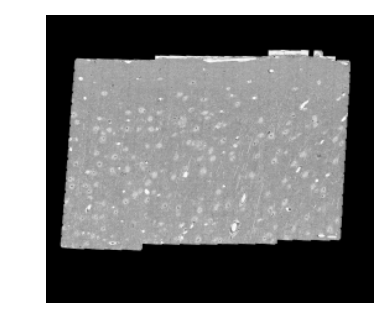

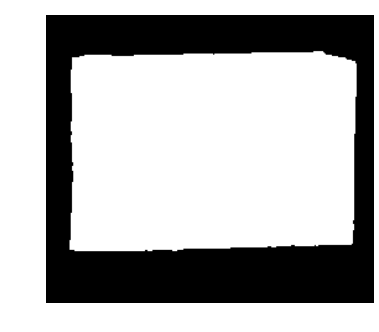

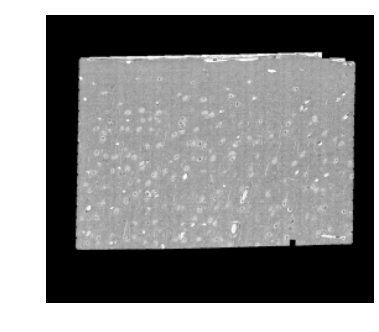

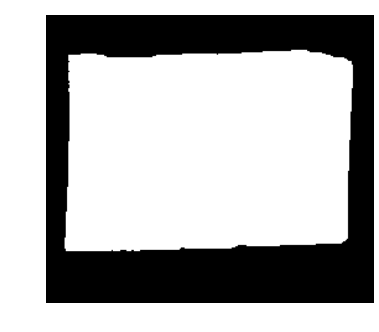

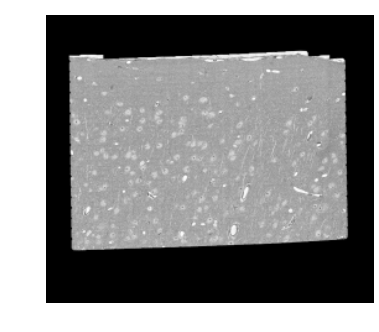

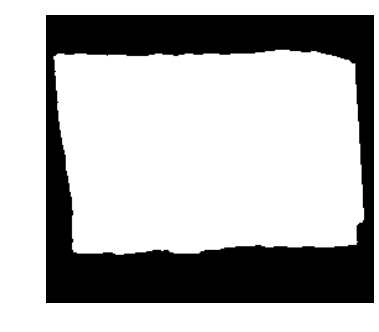

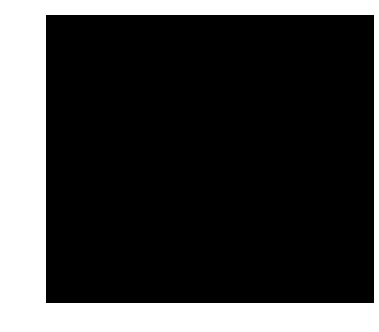

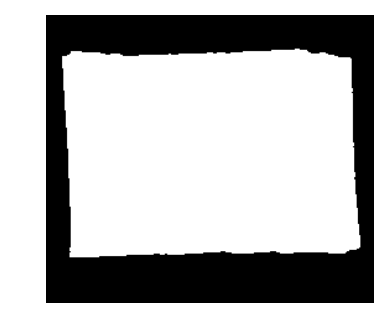

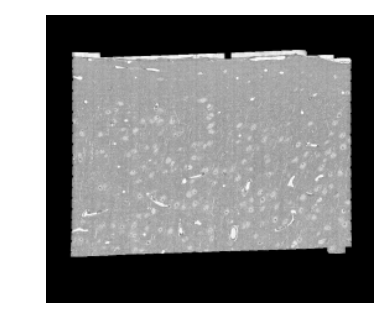

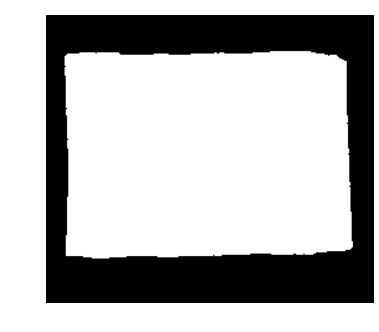

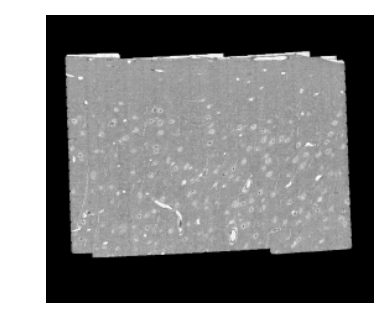

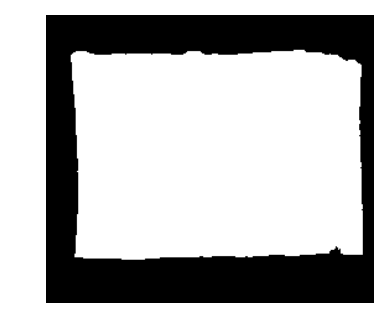

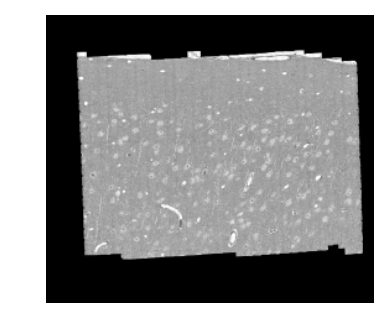

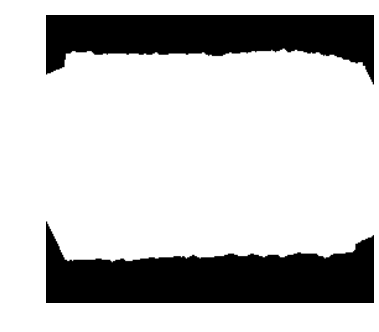

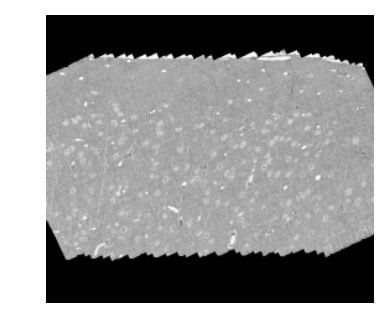

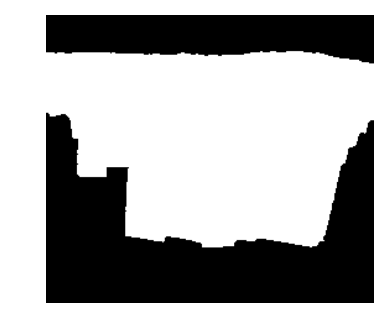

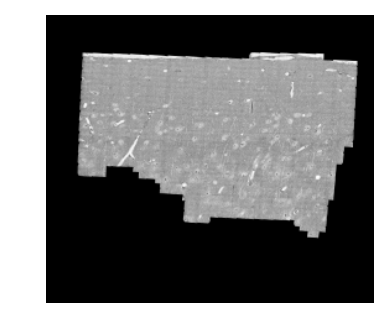

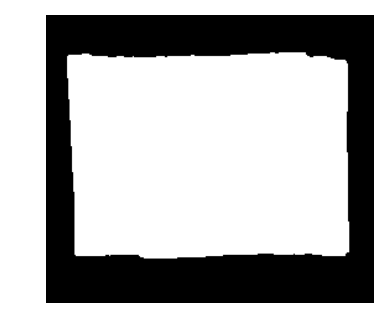

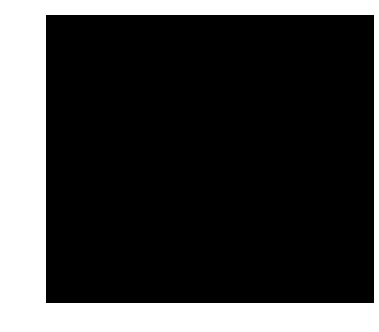

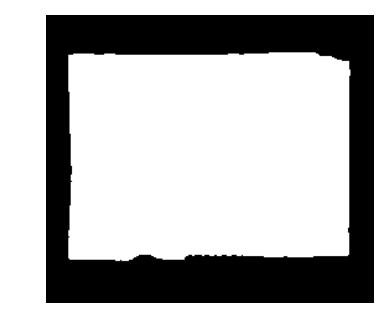

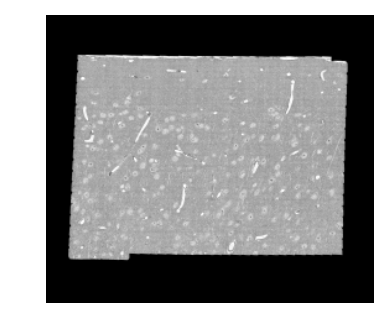

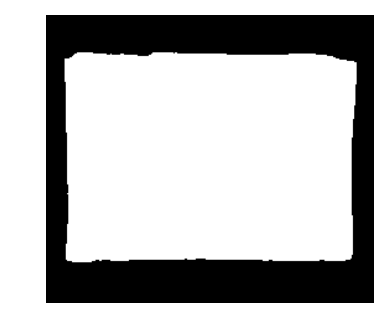

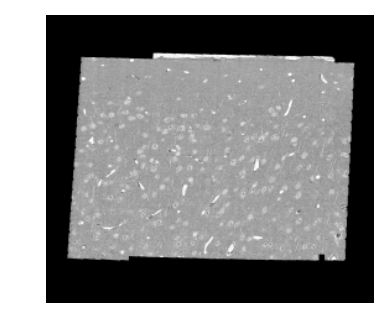

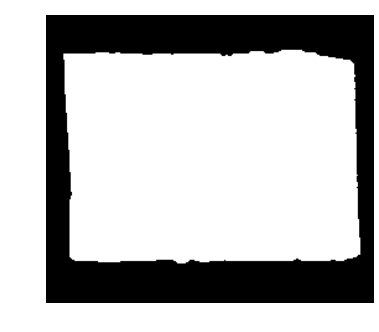

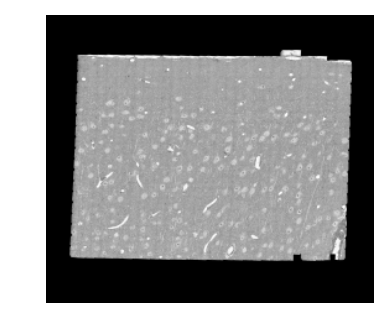

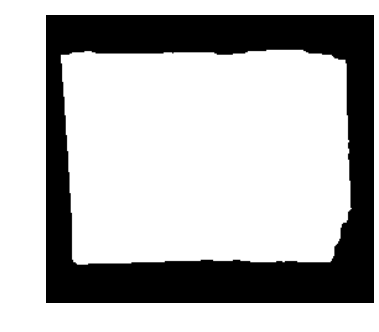

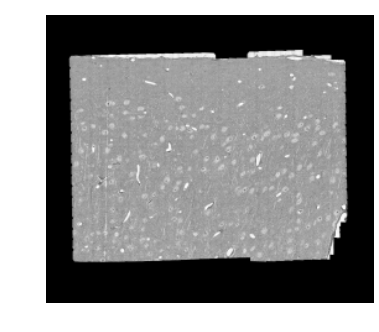

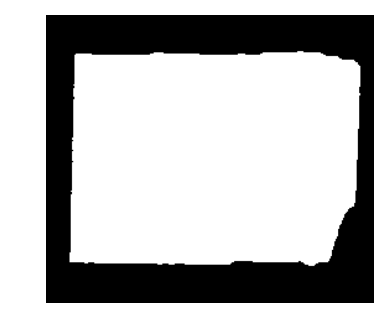

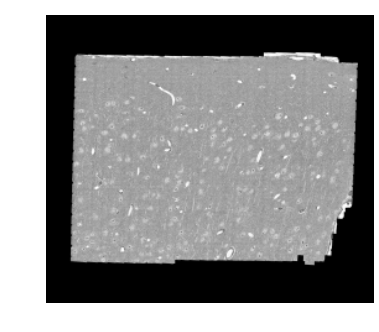

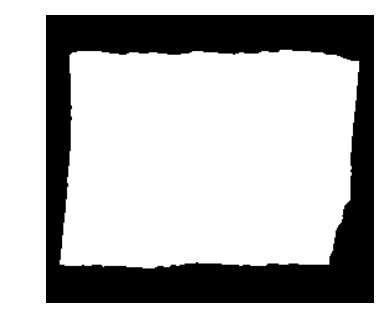

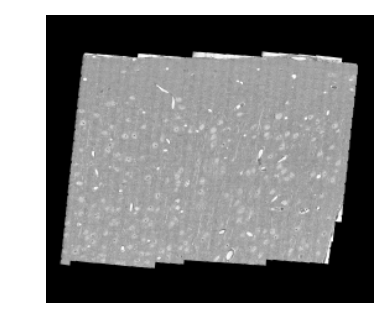

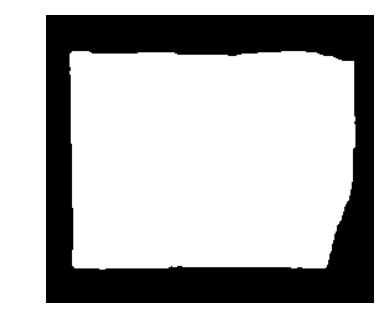

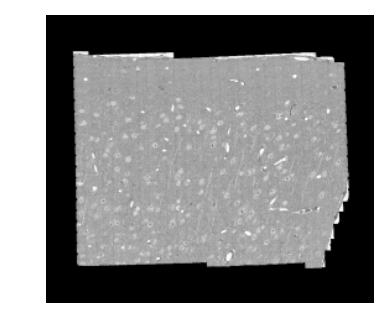

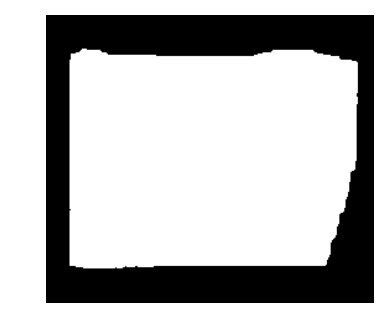

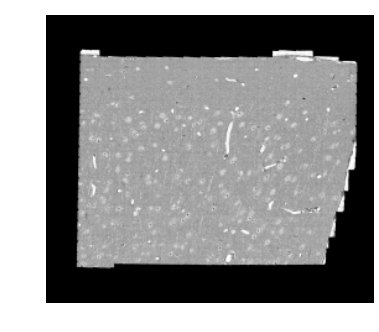

In [94]:
import ndparse as ndp

for i in range(0,1200,50):
    ndp.plot(im3,slice = i)
    ndp.plot(im,slice = i)

In [62]:
ids = nd.get_ramon_ids(token_synapse,channel_synapse)

In [63]:
len(ids) #11668787

11668787

In [66]:
1.0*11668787/0.69*.6

10146771.304347826

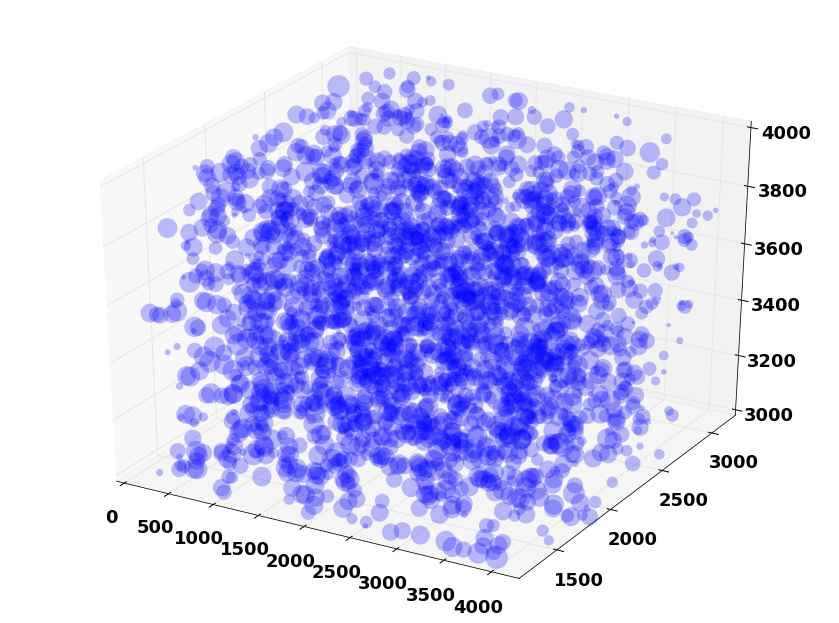

In [71]:
fig0 = plt.figure(figsize=(12,9))

ax = fig0.gca(projection="3d")

p = np.random.permutation(len(new_d))

p = new_d[p[0:5000],:]
ax.scatter3D(
        [d[0] for d in p],
        [d[1] for d in p],
        [d[2] for d in p],
        s=[200*d[11] for d in p],
        alpha = 0.25,
        linewidth=0)

ax.set_xlim([0,4200])
ax.set_ylim([1200,3200])
ax.set_zlim([3000,4000])
plt.tight_layout()


In [83]:
d00 = np.min(new_d[:,0])
d10 = np.min(new_d[:,1])
d20 = np.min(new_d[:,2])

d01 = np.max(new_d[:,0])
d11 = np.max(new_d[:,1])
d21 = np.max(new_d[:,2])

mp = np.zeros([int(d01)+1,int(d11)+1])
for d in new_d:
    mp[int(d[0]),int(d[1])] = mp[int(d[0]),int(d[1])] + d[11]

107
95
10


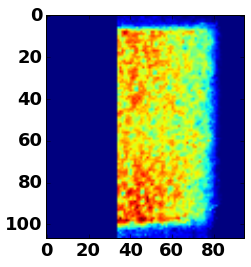

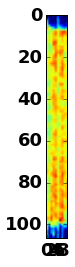

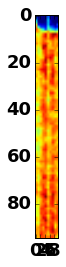

In [131]:
dv0 = np.unique(new_d[:,0])
dv1 = np.unique(new_d[:,1])
dv2 = np.unique(new_d[:,2])

print len(dv0)
print len(dv1)
print len(dv2)

mp = np.zeros([len(dv0),len(dv1)])
xx = 0
yy = 0
for d0 in dv0:
    yy = 0
    for d1 in dv1:
        idx = np.where((new_d[:,0] == d0) & (new_d[:,1] == d1))
        mp[xx,yy] = np.mean(new_d[idx,11])
        yy += 1
    xx += 1
plt.imshow(mp)
plt.show()

mp1 = np.zeros([len(dv0),len(dv2)])
xx = 0
yy = 0
for d0 in dv0:
    yy = 0
    for d2 in dv2:
        idx = np.where((new_d[:,0] == d0) & (new_d[:,2] == d2))
        mp1[xx,yy] = np.mean(new_d[idx,11])
        yy += 1
    xx += 1
plt.imshow(mp1)
plt.show()

mp2 = np.zeros([len(dv1),len(dv2)])
xx = 0
yy = 0
for d1 in dv1:
    yy = 0
    for d2 in dv2:
        idx = np.where((new_d[:,0] == d1) & (new_d[:,2] == d2))
        mp2[xx,yy] = np.mean(new_d[idx,11])
        yy += 1
    xx += 1
plt.imshow(mp2)
plt.show()


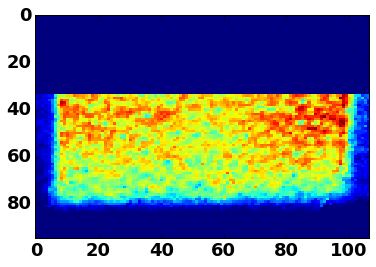

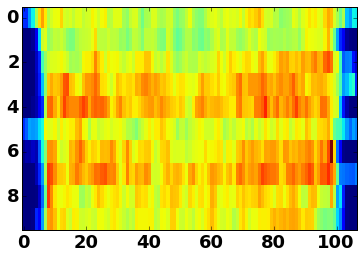

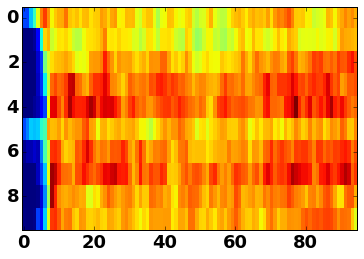

In [167]:
#plt.figure(figsize=(1,100))
#plt.imshow(mp1,aspect='equal', origin='lower')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mp.T,interpolation='nearest')
ax.set_aspect('auto')
#plt.colorbar

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mp1.T,interpolation='nearest')
ax.set_aspect('auto')

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(mp2.T,interpolation='nearest')
ax.set_aspect('auto')

In [130]:
idx

(array([], dtype=int64),)

In [96]:
x = range(0,int(d01))
y = range(0,int(d11))
z = np.ravel(mp)
gridsize=40

# if 'bins=None', then color of each hexagon corresponds directly to its count
# 'C' is optional--it maps values to x-y coordinates; if 'C' is None (default) then 
# the result is a pure 2D histogram 

#plt.hexbin(x, y, C=z, gridsize=gridsize, cmap=plt.cm.jet, bins=None)
#plt.axis([x.min(), x.max(), y.min(), y.max()])
np.histogram2d(mp, bins=40)
cb = plt.colorbar()
cb.set_label('mean value')
plt.show()  



TypeError: histogram2d() takes at least 2 arguments (2 given)

In [97]:
heatmap, xedges, yedges = np.histogram2d([d[0] for d in new_d],
                                         [d[1] for d in new_d], bins=bins, weights=mp)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
plt.imshow(heatmap.T, extent=extent, aspect='auto', origin='lower')
plt.xticks([np.min(new_d[:,0]), np.max(new_d[:,0])])
plt.yticks([np.min(new_d[:,1]), np.max(new_d[:,1])])
plt.ylabel('Y')
plt.xlabel('X')


ValueError: object too deep for desired array

In [98]:
np.size(mp)

15288133

In [99]:
np.shape(mp)

(4151, 3683)

In [101]:
np.size(new_d)

1728033